# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


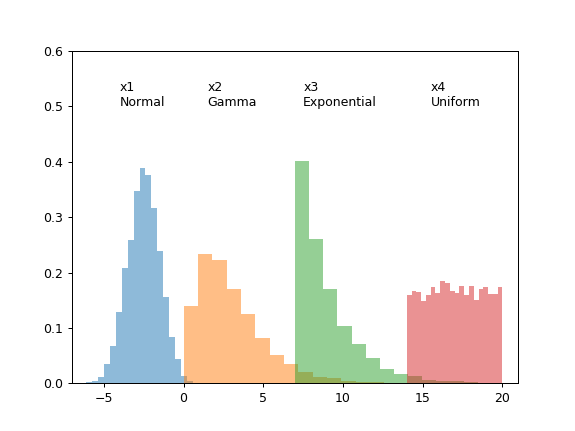

Text(15.513781215063368, 0.5, 'x4\nUniform')

In [5]:
import matplotlib.pyplot as plt
import numpy as np



# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [6]:
def update_subplot(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == 100: 
        a.event_source.stop()
    
    for i in range(0,len(ax)-1):
        ax[i].cla()
        ax[i].hist(x[i][:100*curr], normed = True, bins = bins[i], alpha=0.5, color='blue')
        ax[i].hist(x[i], normed = True, bins = bins[i], alpha=0.5, color='red')
        ax[i].axis(axis[i])
        ax[i].set_title(titles[i])
        ax[i].set_ylabel('Normalized Frequency')
        ax[i].set_xlabel('Value')  

<IPython.core.display.Javascript object>


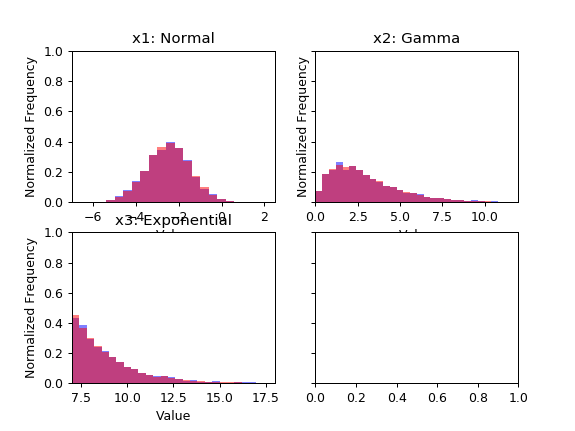

In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import numpy as np

x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

x = [x1, x2, x3, x4]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey = True)

ax = [ax1, ax2, ax3, ax4]

axis1 = [-7, 2.5, 0, 1]
axis2 = [0, 12, 0, 1]
axis3 = [7, 18, 0, 1]
axis4 = [14, 20, 0, 1]

axis = [axis1, axis2, axis3, axis4]

bins1 = np.arange(-7, 2.5, 0.4)
bins2 = np.arange(0, 12, 0.4)
bins3 = np.arange(7, 18, 0.4)
bins4 = np.arange(14, 20, 0.4)

bins = [bins1, bins2, bins3, bins4]

titles = ['x1: Normal', 'x2: Gamma', 'x3: Exponential', 'x4: Uniform']

# create the function that will do the plotting, where curr is the current frame


a = animation.FuncAnimation(fig, update_subplot, interval=100)